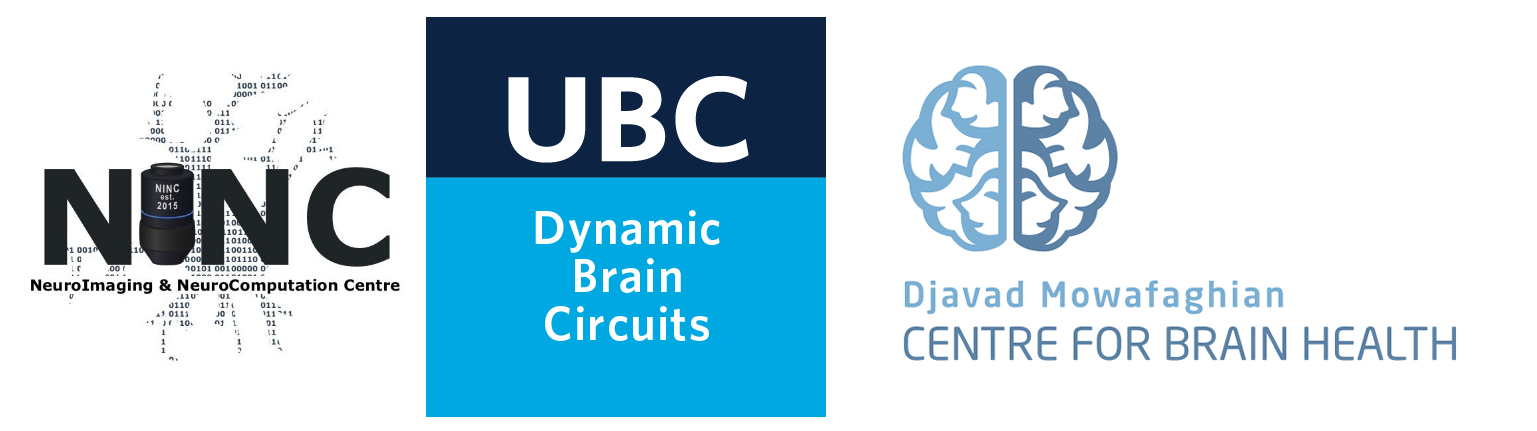

These tutorial notebooks were developed at the Djavad Mowafaghian Centre for Brain Health by the NINC/UBC Brain Circuits team.  If you find the tutorials useful you can acknowledge us with the following statement: 

<em>"This work was supported by resources made available through the Dynamic Brain Circuits cluster and the NeuroImaging and NeuroComputation Core at the UBC Djavad Mowafaghian Centre for Brain Health (RRID:SCR_019086).”</em>

If you use the packages in your research, please cite the originators as per their documentation.

# DeepLabCut Tutorial - Part 2

<b>This jupyter notebook is a continuation of the other notebook titled 'dlc-tutorial_part-1.ipynb'.</b> If you have not already, please complete the steps outlined in that notebook before proceeding with part 2.

In 'dlc-tutorial_part-1.ipynb', you have learned how to set up  labelled data for the model to use to train. In the interest of time, we are providing a better model which has already been trained over many more frames and total iterations to complete the final steps of our workshop. 

If the code block below is showing warnings, check that you have the correct kernel running.

>To view your current kernel or change kernels, go to the top menu bar and click Kernel > Change kernel
In the dropdown menu, you should be selecting ```Python[conda env:DEEPLABCUT]``` or ```Python[conda env:DEEPLABCUT_M1]```, depending on which .yaml file you used.

In [2]:
import deeplabcut
from pathlib import Path #package for managing paths
import glob #package for finding files 

Loading DLC 2.3.9...


Go to <a href="https://osf.io/g9d76/?view_only=4dee0dec63c74fe8ab4f5b0a48623c43">this OSF page</a> and download "dlc_trained_model.zip". In your file explorer, locate the download and unzip, then move the folder (which should be named 'test-AshliandJeff-2021-03-17 4') into 

dlc_demo > my_files > working_dir 

on your local computer.

We will set our 'config_path' variable now to point to the trained model with the code block below:

In [3]:
config_path = Path(Path.cwd(), "my_files", "working_dir", "test-AshliandJeff-2021-03-17", "config.yaml")

The next code block is run to evaluate the accuracy pixels. About 1 pixel is good for an accurate project. You should expect your output to look like so:

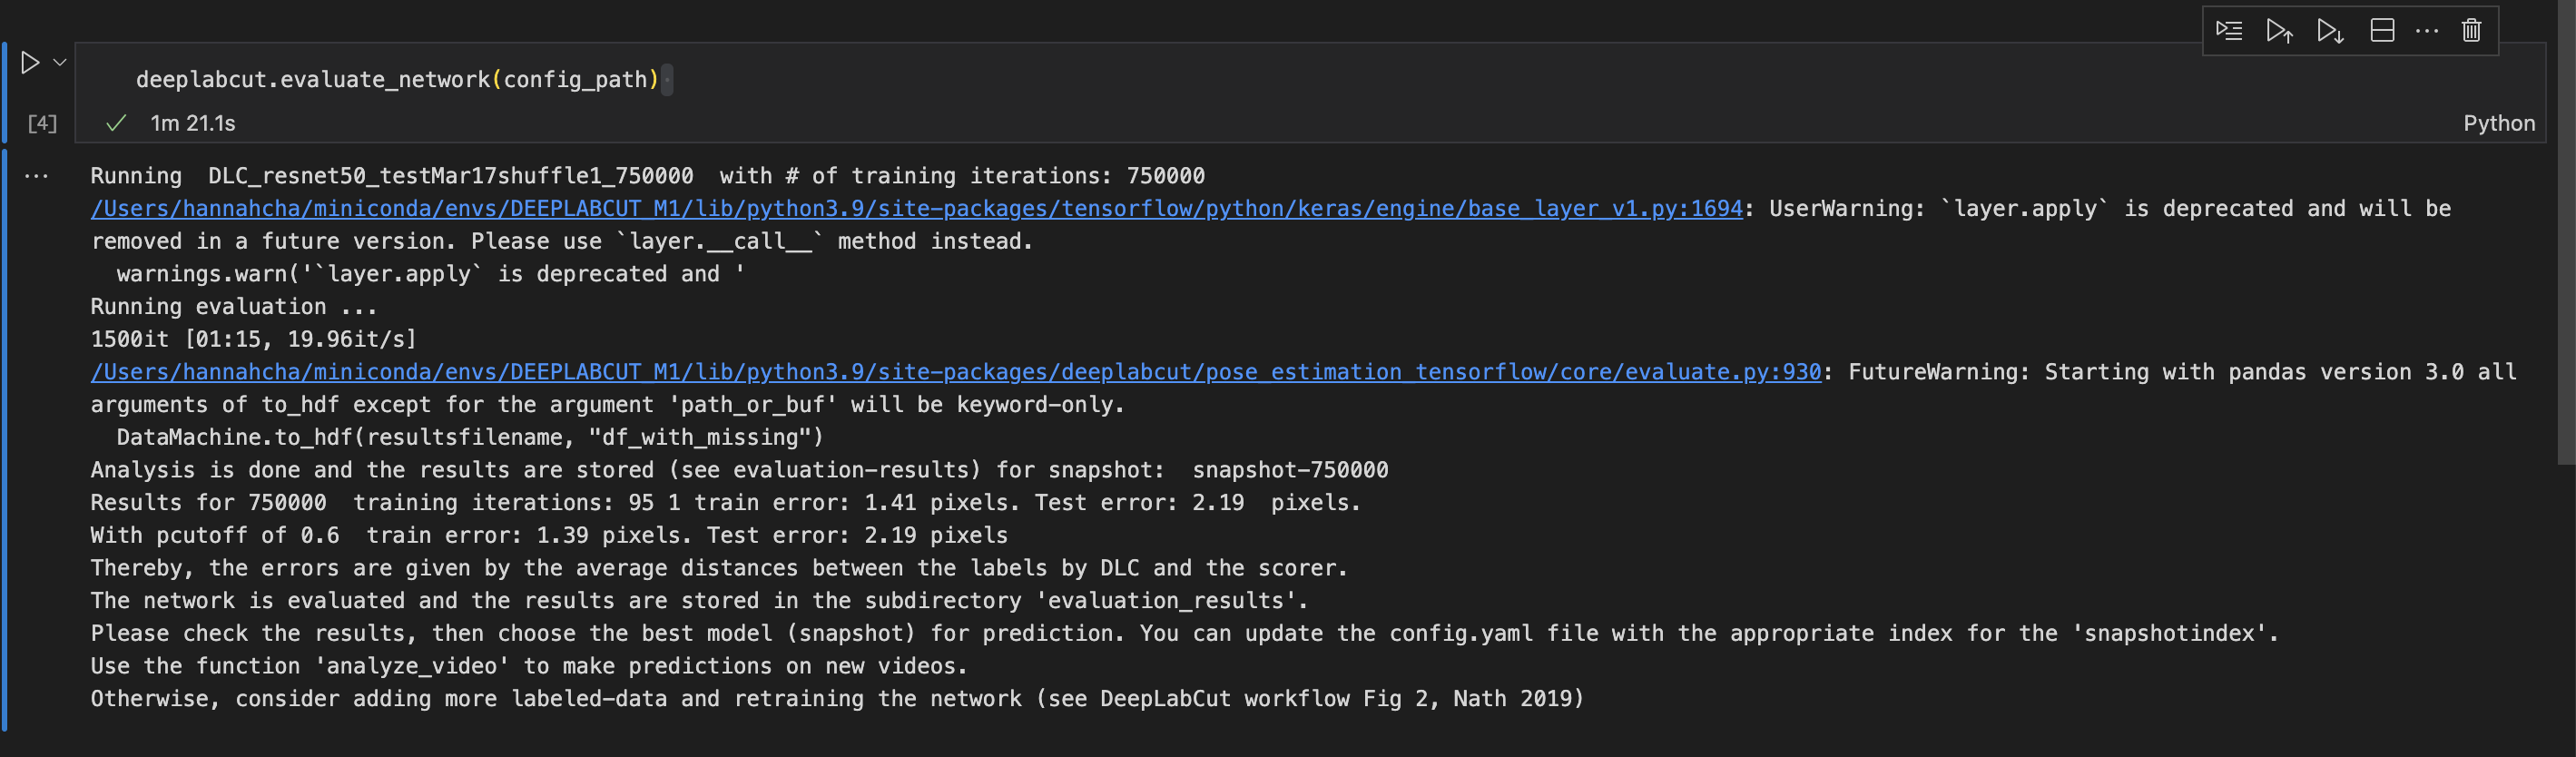

In [4]:
deeplabcut.evaluate_network(config_path) 

Running  DLC_resnet50_testMar17shuffle1_750000  with # of training iterations: 750000


/Users/hannahcha/miniconda/envs/DEEPLABCUT_M1/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Running evaluation ...


1500it [01:15, 19.96it/s]
/Users/hannahcha/miniconda/envs/DEEPLABCUT_M1/lib/python3.9/site-packages/deeplabcut/pose_estimation_tensorflow/core/evaluate.py:930: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  DataMachine.to_hdf(resultsfilename, "df_with_missing")


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-750000
Results for 750000  training iterations: 95 1 train error: 1.41 pixels. Test error: 2.19  pixels.
With pcutoff of 0.6  train error: 1.39 pixels. Test error: 2.19 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
Please check the results, then choose the best model (snapshot) for prediction. You can update the config.yaml file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise, consider adding more labeled-data and retraining the network (see DeepLabCut workflow Fig 2, Nath 2019)


We now want to use the trained model to analyze the videos we downloaded. The 'video_path' variable is set to point to the folder where our downloaded videos are, then we run the analysis. This step will take a couple minutes.

'save_as_csv' set to 'True' will create a csv file which includes XY coordinates of the labelled points in each frame in the video, as well as the model's confidence in their locations.

>If DLC reports the video has already been analyzed, you can delete any output that might already be existing in the folder labeled "evaluation-results" to re-do.

This code block will take ~30 minutes to complete. It should look like the following when it has completed:

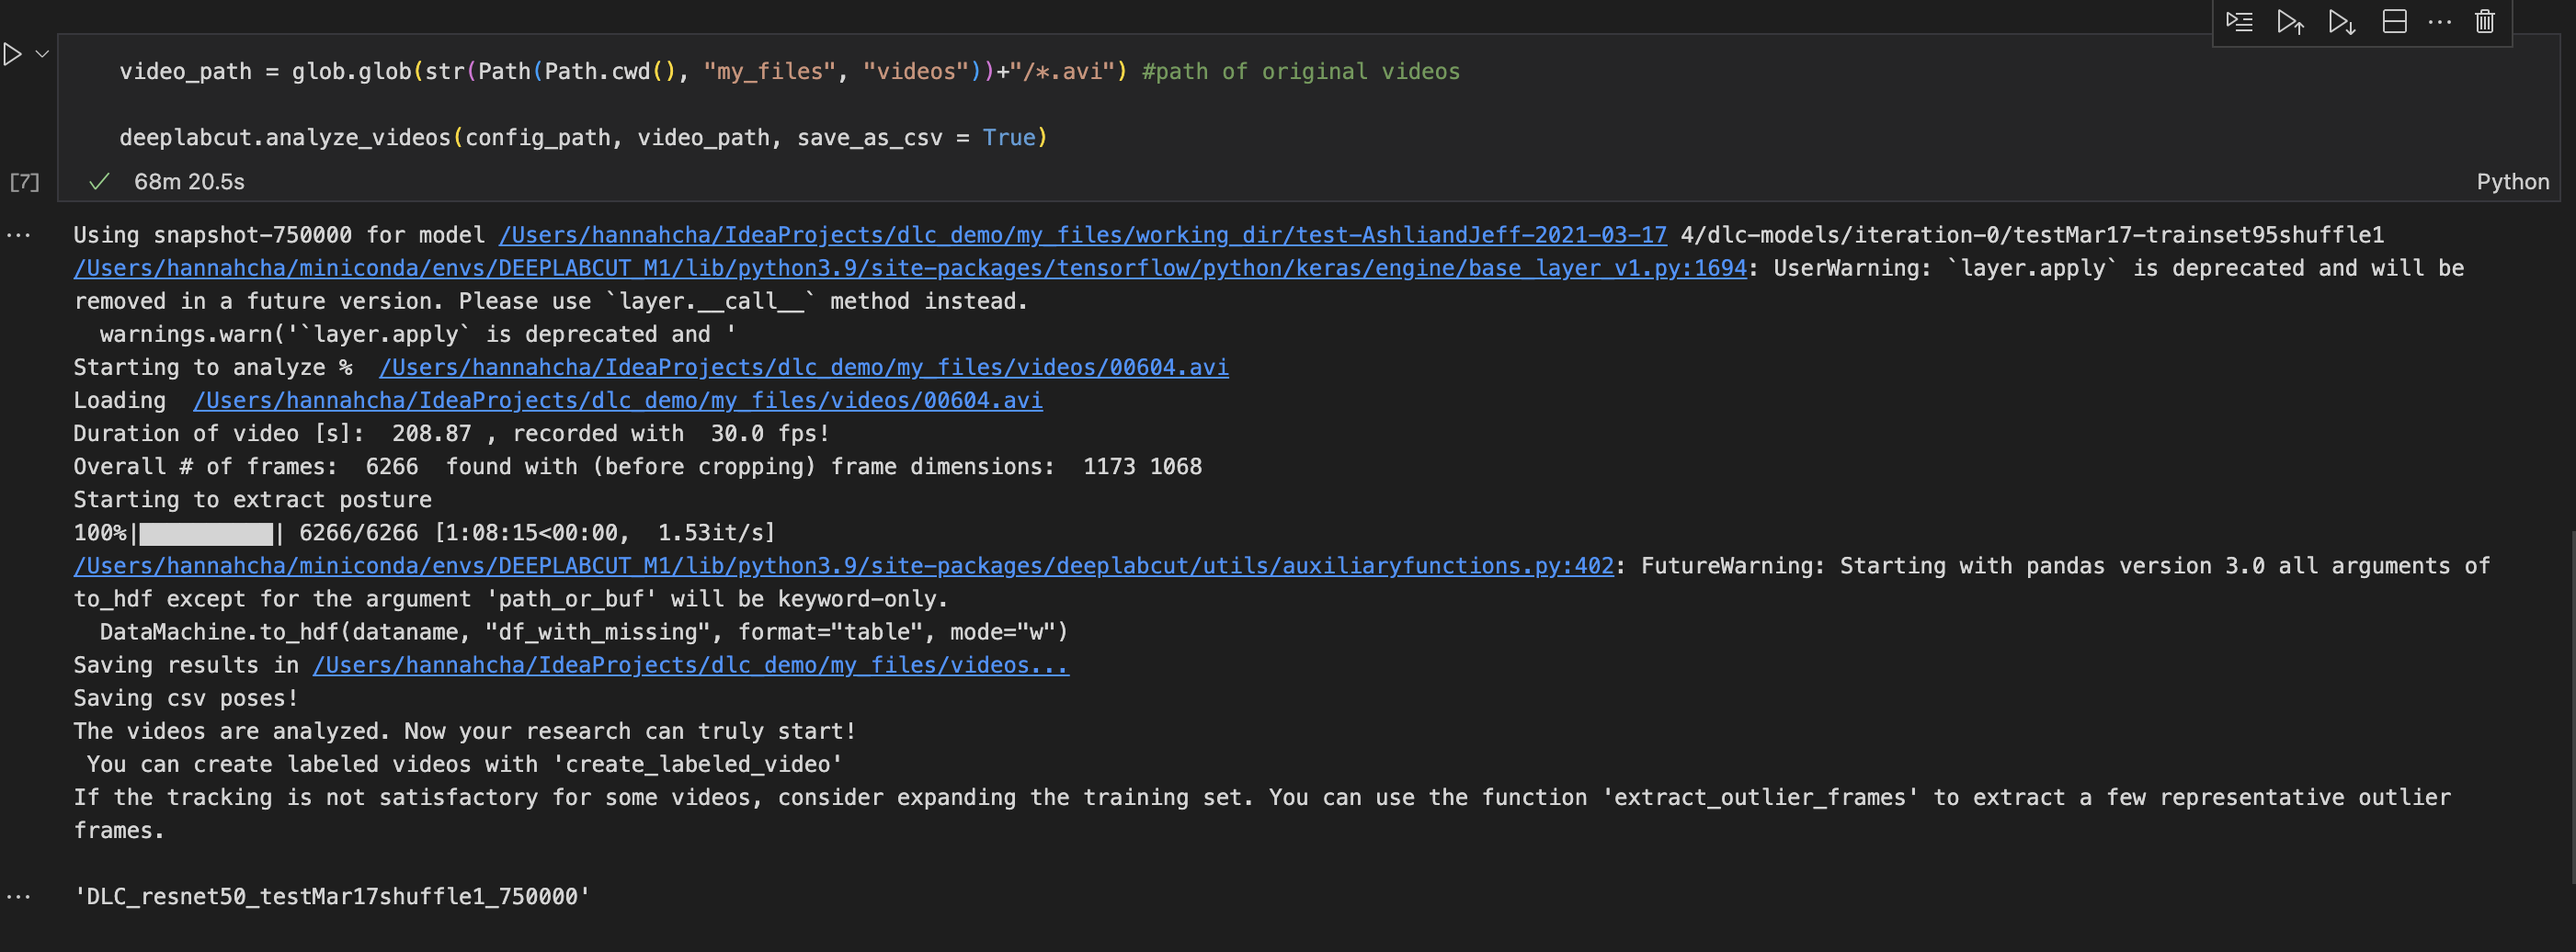

In the meantime, to view the final product, you can head back to the <a href="https://osf.io/a3gmp/?view_only=35aa9a33ad90429a81d73dfce04f70a9">OSF page</a> and view the contents of the folder titled 'final_results'. 

In [7]:
video_path = glob.glob(str(Path(Path.cwd(), "my_files", "videos"))+"/*.avi") #path of original videos

deeplabcut.analyze_videos(config_path, video_path, save_as_csv = True)

Using snapshot-750000 for model /Users/hannahcha/IdeaProjects/dlc_demo/my_files/working_dir/test-AshliandJeff-2021-03-17 4/dlc-models/iteration-0/testMar17-trainset95shuffle1


/Users/hannahcha/miniconda/envs/DEEPLABCUT_M1/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Starting to analyze %  /Users/hannahcha/IdeaProjects/dlc_demo/my_files/videos/00604.avi
Loading  /Users/hannahcha/IdeaProjects/dlc_demo/my_files/videos/00604.avi
Duration of video [s]:  208.87 , recorded with  30.0 fps!
Overall # of frames:  6266  found with (before cropping) frame dimensions:  1173 1068
Starting to extract posture


100%|██████████| 6266/6266 [1:08:15<00:00,  1.53it/s]  
/Users/hannahcha/miniconda/envs/DEEPLABCUT_M1/lib/python3.9/site-packages/deeplabcut/utils/auxiliaryfunctions.py:402: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  DataMachine.to_hdf(dataname, "df_with_missing", format="table", mode="w")


Saving results in /Users/hannahcha/IdeaProjects/dlc_demo/my_files/videos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


'DLC_resnet50_testMar17shuffle1_750000'

This next step will place the labelled video and its associated csv in the 'videos' folder. The result should look similar to the image below:

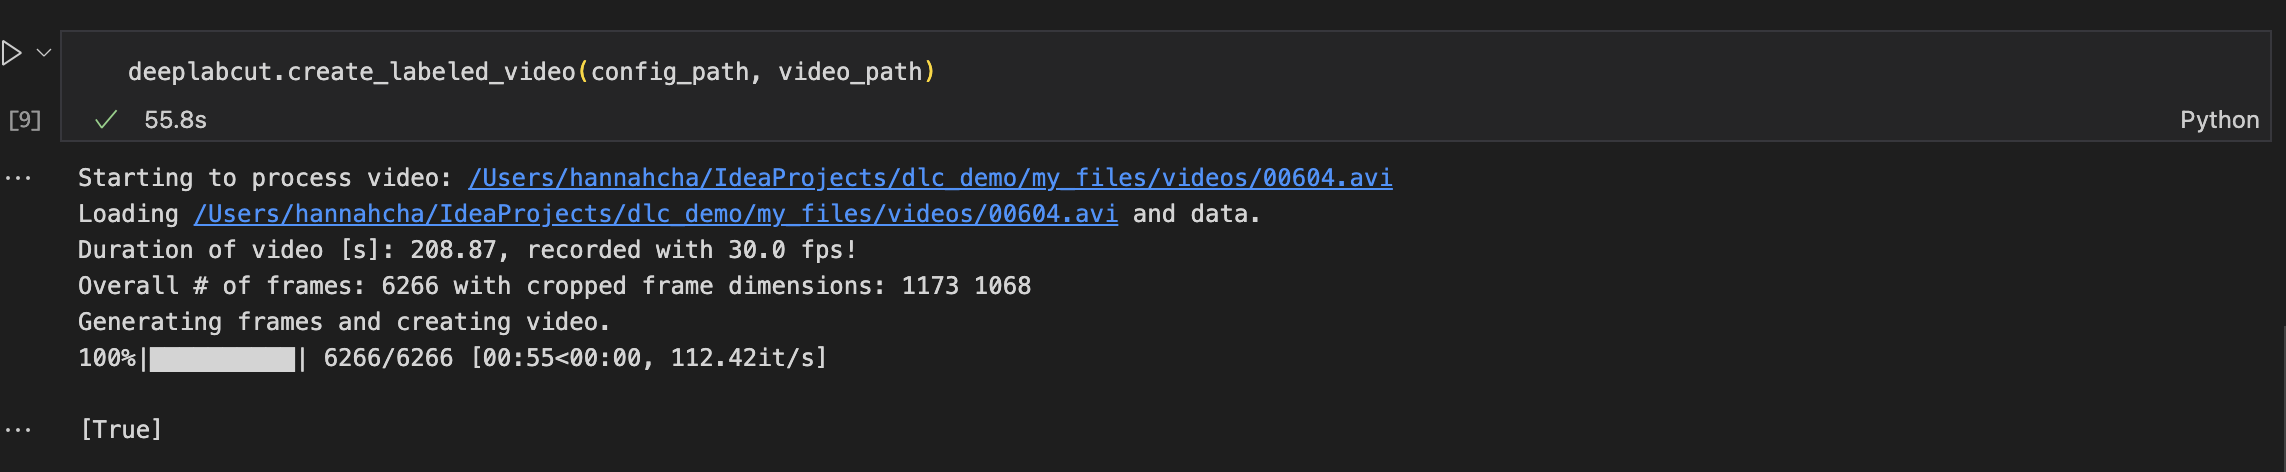

In [9]:
deeplabcut.create_labeled_video(config_path, video_path)

Starting to process video: /Users/hannahcha/IdeaProjects/dlc_demo/my_files/videos/00604.avi
Loading /Users/hannahcha/IdeaProjects/dlc_demo/my_files/videos/00604.avi and data.
Duration of video [s]: 208.87, recorded with 30.0 fps!
Overall # of frames: 6266 with cropped frame dimensions: 1173 1068
Generating frames and creating video.


100%|██████████| 6266/6266 [00:55<00:00, 112.42it/s]


[True]

After the last code block, you should see new files have been created in your 'videos' folder. The file titled '00604DLC_resnet50_testMar17shuffle1_750000_labeled.mp4' is your labelled video.